In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np

In [2]:
with open('data/day8_input.txt') as f:
    lines = f.readlines()

In [3]:
# lines = ['30373\n',
#         '25512\n',
#         '65332\n',
#         '33549\n',
#         '35390\n']

In [4]:
lines = [[*line] for line in lines]

In [5]:
def data_list_to_gdf(data):
    data_list = []
    x = 0
    y = 0
    while x < len(lines):
        for line in lines[x]:
            for num in line:
                if line == '\n':
                    continue
                data_list.append({'val':int(line), 'xcoord':x, 'ycoord':y})
                y += 1    
        x += 1
        y=0
    return pd.DataFrame(data_list)

In [6]:
df = data_list_to_gdf(lines)
print(df)

      val  xcoord  ycoord
0       3       0       0
1       1       0       1
2       3       0       2
3       2       0       3
4       1       0       4
...   ...     ...     ...
9796    0      98      94
9797    1      98      95
9798    0      98      96
9799    0      98      97
9800    2      98      98

[9801 rows x 3 columns]


In [7]:
geometry = [Point(xy) for xy in zip(df.xcoord, df.ycoord)]
gdf = gpd.GeoDataFrame(df, geometry=geometry)
gdf.head()

,val,xcoord,ycoord,geometry
0,3,0,0,POINT (0.00000 0.00000)
1,1,0,1,POINT (0.00000 1.00000)
2,3,0,2,POINT (0.00000 2.00000)
3,2,0,3,POINT (0.00000 3.00000)
4,1,0,4,POINT (0.00000 4.00000)


<AxesSubplot:>

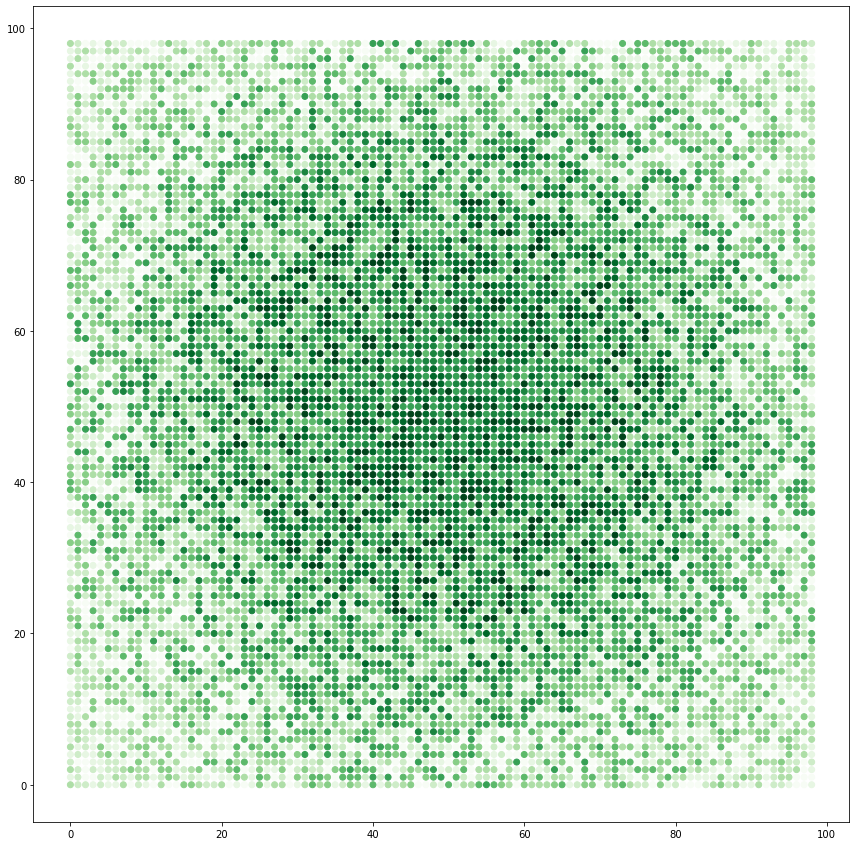

In [8]:
gdf.plot('val', cmap = 'Greens', figsize=(15,15))

In [9]:
gdf['visible'] = False

In [16]:
considering_row = 0
highest_value = -1
for i, tree in gdf.iterrows():
    print(f"At {tree['xcoord']}, {tree['ycoord']}: comparing {tree['val']} to {highest_value}")
    
    if tree['xcoord'] != considering_row:
        # We've moved to a new row - reset highest_value to -1
        considering_row = tree['xcoord']
        highest_value = -1
    
    if tree['val'] > highest_value:
        gdf.loc[i, 'visible'] = True
        highest_value = tree['val']

At 0, 0: comparing 3 to -1
At 0, 1: comparing 1 to 3
At 0, 2: comparing 3 to 3
At 0, 3: comparing 2 to 3
At 0, 4: comparing 1 to 3
At 0, 5: comparing 3 to 3
At 0, 6: comparing 1 to 3
At 0, 7: comparing 2 to 3
At 0, 8: comparing 3 to 3
At 0, 9: comparing 2 to 3
At 0, 10: comparing 1 to 3
At 0, 11: comparing 2 to 3
At 0, 12: comparing 2 to 3
At 0, 13: comparing 0 to 3
At 0, 14: comparing 0 to 3
At 0, 15: comparing 3 to 3
At 0, 16: comparing 1 to 3
At 0, 17: comparing 2 to 3
At 0, 18: comparing 0 to 3
At 0, 19: comparing 1 to 3
At 0, 20: comparing 1 to 3
At 0, 21: comparing 2 to 3
At 0, 22: comparing 4 to 3
At 0, 23: comparing 3 to 4
At 0, 24: comparing 2 to 4
At 0, 25: comparing 0 to 4
At 0, 26: comparing 3 to 4
At 0, 27: comparing 1 to 4
At 0, 28: comparing 2 to 4
At 0, 29: comparing 0 to 4
At 0, 30: comparing 2 to 4
At 0, 31: comparing 1 to 4
At 0, 32: comparing 4 to 4
At 0, 33: comparing 0 to 4
At 0, 34: comparing 1 to 4
At 0, 35: comparing 0 to 4
At 0, 36: comparing 2 to 4
At 0, 37: 

At 6, 76: comparing 0 to 6
At 6, 77: comparing 1 to 6
At 6, 78: comparing 5 to 6
At 6, 79: comparing 2 to 6
At 6, 80: comparing 0 to 6
At 6, 81: comparing 0 to 6
At 6, 82: comparing 5 to 6
At 6, 83: comparing 4 to 6
At 6, 84: comparing 1 to 6
At 6, 85: comparing 1 to 6
At 6, 86: comparing 3 to 6
At 6, 87: comparing 5 to 6
At 6, 88: comparing 4 to 6
At 6, 89: comparing 1 to 6
At 6, 90: comparing 1 to 6
At 6, 91: comparing 4 to 6
At 6, 92: comparing 4 to 6
At 6, 93: comparing 0 to 6
At 6, 94: comparing 4 to 6
At 6, 95: comparing 3 to 6
At 6, 96: comparing 0 to 6
At 6, 97: comparing 3 to 6
At 6, 98: comparing 1 to 6
At 7, 0: comparing 3 to 6
At 7, 1: comparing 2 to 3
At 7, 2: comparing 3 to 3
At 7, 3: comparing 1 to 3
At 7, 4: comparing 4 to 3
At 7, 5: comparing 0 to 4
At 7, 6: comparing 3 to 4
At 7, 7: comparing 2 to 4
At 7, 8: comparing 0 to 4
At 7, 9: comparing 0 to 4
At 7, 10: comparing 2 to 4
At 7, 11: comparing 4 to 4
At 7, 12: comparing 3 to 4
At 7, 13: comparing 1 to 4
At 7, 14: c

At 12, 93: comparing 3 to 7
At 12, 94: comparing 1 to 7
At 12, 95: comparing 4 to 7
At 12, 96: comparing 2 to 7
At 12, 97: comparing 1 to 7
At 12, 98: comparing 2 to 7
At 13, 0: comparing 0 to 7
At 13, 1: comparing 4 to 0
At 13, 2: comparing 4 to 4
At 13, 3: comparing 1 to 4
At 13, 4: comparing 4 to 4
At 13, 5: comparing 3 to 4
At 13, 6: comparing 0 to 4
At 13, 7: comparing 2 to 4
At 13, 8: comparing 1 to 4
At 13, 9: comparing 3 to 4
At 13, 10: comparing 0 to 4
At 13, 11: comparing 4 to 4
At 13, 12: comparing 5 to 4
At 13, 13: comparing 3 to 5
At 13, 14: comparing 3 to 5
At 13, 15: comparing 0 to 5
At 13, 16: comparing 3 to 5
At 13, 17: comparing 6 to 5
At 13, 18: comparing 5 to 6
At 13, 19: comparing 2 to 6
At 13, 20: comparing 4 to 6
At 13, 21: comparing 1 to 6
At 13, 22: comparing 1 to 6
At 13, 23: comparing 5 to 6
At 13, 24: comparing 2 to 6
At 13, 25: comparing 0 to 6
At 13, 26: comparing 0 to 6
At 13, 27: comparing 3 to 6
At 13, 28: comparing 6 to 6
At 13, 29: comparing 3 to 6
At

At 22, 74: comparing 2 to 9
At 22, 75: comparing 5 to 9
At 22, 76: comparing 7 to 9
At 22, 77: comparing 7 to 9
At 22, 78: comparing 4 to 9
At 22, 79: comparing 5 to 9
At 22, 80: comparing 1 to 9
At 22, 81: comparing 3 to 9
At 22, 82: comparing 5 to 9
At 22, 83: comparing 6 to 9
At 22, 84: comparing 4 to 9
At 22, 85: comparing 6 to 9
At 22, 86: comparing 3 to 9
At 22, 87: comparing 1 to 9
At 22, 88: comparing 3 to 9
At 22, 89: comparing 2 to 9
At 22, 90: comparing 0 to 9
At 22, 91: comparing 6 to 9
At 22, 92: comparing 2 to 9
At 22, 93: comparing 2 to 9
At 22, 94: comparing 3 to 9
At 22, 95: comparing 4 to 9
At 22, 96: comparing 2 to 9
At 22, 97: comparing 3 to 9
At 22, 98: comparing 2 to 9
At 23, 0: comparing 0 to 9
At 23, 1: comparing 3 to 0
At 23, 2: comparing 0 to 3
At 23, 3: comparing 5 to 3
At 23, 4: comparing 2 to 5
At 23, 5: comparing 0 to 5
At 23, 6: comparing 5 to 5
At 23, 7: comparing 3 to 5
At 23, 8: comparing 3 to 5
At 23, 9: comparing 6 to 5
At 23, 10: comparing 0 to 6
At

At 29, 84: comparing 7 to 9
At 29, 85: comparing 5 to 9
At 29, 86: comparing 3 to 9
At 29, 87: comparing 5 to 9
At 29, 88: comparing 5 to 9
At 29, 89: comparing 1 to 9
At 29, 90: comparing 3 to 9
At 29, 91: comparing 2 to 9
At 29, 92: comparing 2 to 9
At 29, 93: comparing 3 to 9
At 29, 94: comparing 0 to 9
At 29, 95: comparing 5 to 9
At 29, 96: comparing 1 to 9
At 29, 97: comparing 2 to 9
At 29, 98: comparing 3 to 9
At 30, 0: comparing 1 to 9
At 30, 1: comparing 4 to 1
At 30, 2: comparing 2 to 4
At 30, 3: comparing 1 to 4
At 30, 4: comparing 4 to 4
At 30, 5: comparing 0 to 4
At 30, 6: comparing 4 to 4
At 30, 7: comparing 5 to 4
At 30, 8: comparing 0 to 5
At 30, 9: comparing 6 to 5
At 30, 10: comparing 5 to 6
At 30, 11: comparing 6 to 6
At 30, 12: comparing 7 to 6
At 30, 13: comparing 7 to 7
At 30, 14: comparing 6 to 7
At 30, 15: comparing 2 to 7
At 30, 16: comparing 2 to 7
At 30, 17: comparing 7 to 7
At 30, 18: comparing 7 to 7
At 30, 19: comparing 1 to 7
At 30, 20: comparing 4 to 7
At

At 37, 93: comparing 2 to 9
At 37, 94: comparing 1 to 9
At 37, 95: comparing 0 to 9
At 37, 96: comparing 6 to 9
At 37, 97: comparing 3 to 9
At 37, 98: comparing 3 to 9
At 38, 0: comparing 3 to 9
At 38, 1: comparing 5 to 3
At 38, 2: comparing 4 to 5
At 38, 3: comparing 6 to 5
At 38, 4: comparing 4 to 6
At 38, 5: comparing 1 to 6
At 38, 6: comparing 6 to 6
At 38, 7: comparing 4 to 6
At 38, 8: comparing 1 to 6
At 38, 9: comparing 6 to 6
At 38, 10: comparing 6 to 6
At 38, 11: comparing 3 to 6
At 38, 12: comparing 1 to 6
At 38, 13: comparing 6 to 6
At 38, 14: comparing 6 to 6
At 38, 15: comparing 2 to 6
At 38, 16: comparing 4 to 6
At 38, 17: comparing 7 to 6
At 38, 18: comparing 2 to 7
At 38, 19: comparing 3 to 7
At 38, 20: comparing 6 to 7
At 38, 21: comparing 4 to 7
At 38, 22: comparing 6 to 7
At 38, 23: comparing 3 to 7
At 38, 24: comparing 8 to 7
At 38, 25: comparing 6 to 8
At 38, 26: comparing 3 to 8
At 38, 27: comparing 6 to 8
At 38, 28: comparing 8 to 8
At 38, 29: comparing 7 to 8
At

At 45, 47: comparing 7 to 9
At 45, 48: comparing 9 to 9
At 45, 49: comparing 9 to 9
At 45, 50: comparing 6 to 9
At 45, 51: comparing 6 to 9
At 45, 52: comparing 7 to 9
At 45, 53: comparing 8 to 9
At 45, 54: comparing 8 to 9
At 45, 55: comparing 8 to 9
At 45, 56: comparing 7 to 9
At 45, 57: comparing 7 to 9
At 45, 58: comparing 6 to 9
At 45, 59: comparing 9 to 9
At 45, 60: comparing 8 to 9
At 45, 61: comparing 7 to 9
At 45, 62: comparing 9 to 9
At 45, 63: comparing 9 to 9
At 45, 64: comparing 5 to 9
At 45, 65: comparing 4 to 9
At 45, 66: comparing 8 to 9
At 45, 67: comparing 5 to 9
At 45, 68: comparing 4 to 9
At 45, 69: comparing 5 to 9
At 45, 70: comparing 9 to 9
At 45, 71: comparing 9 to 9
At 45, 72: comparing 8 to 9
At 45, 73: comparing 6 to 9
At 45, 74: comparing 5 to 9
At 45, 75: comparing 5 to 9
At 45, 76: comparing 9 to 9
At 45, 77: comparing 9 to 9
At 45, 78: comparing 8 to 9
At 45, 79: comparing 4 to 9
At 45, 80: comparing 6 to 9
At 45, 81: comparing 6 to 9
At 45, 82: comparing

At 51, 95: comparing 2 to 9
At 51, 96: comparing 3 to 9
At 51, 97: comparing 1 to 9
At 51, 98: comparing 4 to 9
At 52, 0: comparing 3 to 9
At 52, 1: comparing 2 to 3
At 52, 2: comparing 5 to 3
At 52, 3: comparing 3 to 5
At 52, 4: comparing 5 to 5
At 52, 5: comparing 4 to 5
At 52, 6: comparing 0 to 5
At 52, 7: comparing 1 to 5
At 52, 8: comparing 4 to 5
At 52, 9: comparing 3 to 5
At 52, 10: comparing 2 to 5
At 52, 11: comparing 3 to 5
At 52, 12: comparing 7 to 5
At 52, 13: comparing 6 to 7
At 52, 14: comparing 7 to 7
At 52, 15: comparing 7 to 7
At 52, 16: comparing 2 to 7
At 52, 17: comparing 2 to 7
At 52, 18: comparing 2 to 7
At 52, 19: comparing 6 to 7
At 52, 20: comparing 4 to 7
At 52, 21: comparing 8 to 7
At 52, 22: comparing 8 to 8
At 52, 23: comparing 9 to 8
At 52, 24: comparing 5 to 9
At 52, 25: comparing 8 to 9
At 52, 26: comparing 4 to 9
At 52, 27: comparing 5 to 9
At 52, 28: comparing 3 to 9
At 52, 29: comparing 4 to 9
At 52, 30: comparing 8 to 9
At 52, 31: comparing 9 to 9
At

At 61, 71: comparing 9 to 9
At 61, 72: comparing 5 to 9
At 61, 73: comparing 6 to 9
At 61, 74: comparing 9 to 9
At 61, 75: comparing 8 to 9
At 61, 76: comparing 3 to 9
At 61, 77: comparing 8 to 9
At 61, 78: comparing 4 to 9
At 61, 79: comparing 6 to 9
At 61, 80: comparing 4 to 9
At 61, 81: comparing 5 to 9
At 61, 82: comparing 6 to 9
At 61, 83: comparing 5 to 9
At 61, 84: comparing 7 to 9
At 61, 85: comparing 7 to 9
At 61, 86: comparing 1 to 9
At 61, 87: comparing 4 to 9
At 61, 88: comparing 4 to 9
At 61, 89: comparing 3 to 9
At 61, 90: comparing 3 to 9
At 61, 91: comparing 4 to 9
At 61, 92: comparing 1 to 9
At 61, 93: comparing 4 to 9
At 61, 94: comparing 3 to 9
At 61, 95: comparing 3 to 9
At 61, 96: comparing 6 to 9
At 61, 97: comparing 2 to 9
At 61, 98: comparing 4 to 9
At 62, 0: comparing 3 to 9
At 62, 1: comparing 5 to 3
At 62, 2: comparing 1 to 5
At 62, 3: comparing 2 to 5
At 62, 4: comparing 2 to 5
At 62, 5: comparing 6 to 5
At 62, 6: comparing 4 to 6
At 62, 7: comparing 3 to 6


At 69, 86: comparing 7 to 9
At 69, 87: comparing 1 to 9
At 69, 88: comparing 4 to 9
At 69, 89: comparing 6 to 9
At 69, 90: comparing 3 to 9
At 69, 91: comparing 4 to 9
At 69, 92: comparing 1 to 9
At 69, 93: comparing 6 to 9
At 69, 94: comparing 4 to 9
At 69, 95: comparing 4 to 9
At 69, 96: comparing 1 to 9
At 69, 97: comparing 5 to 9
At 69, 98: comparing 0 to 9
At 70, 0: comparing 0 to 9
At 70, 1: comparing 2 to 0
At 70, 2: comparing 3 to 2
At 70, 3: comparing 1 to 3
At 70, 4: comparing 4 to 3
At 70, 5: comparing 6 to 4
At 70, 6: comparing 2 to 6
At 70, 7: comparing 6 to 6
At 70, 8: comparing 4 to 6
At 70, 9: comparing 5 to 6
At 70, 10: comparing 0 to 6
At 70, 11: comparing 4 to 6
At 70, 12: comparing 2 to 6
At 70, 13: comparing 5 to 6
At 70, 14: comparing 6 to 6
At 70, 15: comparing 4 to 6
At 70, 16: comparing 4 to 6
At 70, 17: comparing 1 to 6
At 70, 18: comparing 7 to 6
At 70, 19: comparing 5 to 7
At 70, 20: comparing 6 to 7
At 70, 21: comparing 6 to 7
At 70, 22: comparing 4 to 7
At

At 75, 26: comparing 6 to 8
At 75, 27: comparing 8 to 8
At 75, 28: comparing 4 to 8
At 75, 29: comparing 4 to 8
At 75, 30: comparing 5 to 8
At 75, 31: comparing 5 to 8
At 75, 32: comparing 3 to 8
At 75, 33: comparing 5 to 8
At 75, 34: comparing 3 to 8
At 75, 35: comparing 2 to 8
At 75, 36: comparing 8 to 8
At 75, 37: comparing 9 to 8
At 75, 38: comparing 7 to 9
At 75, 39: comparing 7 to 9
At 75, 40: comparing 9 to 9
At 75, 41: comparing 7 to 9
At 75, 42: comparing 3 to 9
At 75, 43: comparing 5 to 9
At 75, 44: comparing 7 to 9
At 75, 45: comparing 6 to 9
At 75, 46: comparing 3 to 9
At 75, 47: comparing 8 to 9
At 75, 48: comparing 5 to 9
At 75, 49: comparing 3 to 9
At 75, 50: comparing 9 to 9
At 75, 51: comparing 4 to 9
At 75, 52: comparing 9 to 9
At 75, 53: comparing 7 to 9
At 75, 54: comparing 8 to 9
At 75, 55: comparing 8 to 9
At 75, 56: comparing 9 to 9
At 75, 57: comparing 5 to 9
At 75, 58: comparing 5 to 9
At 75, 59: comparing 4 to 9
At 75, 60: comparing 7 to 9
At 75, 61: comparing

At 85, 48: comparing 5 to 8
At 85, 49: comparing 5 to 8
At 85, 50: comparing 6 to 8
At 85, 51: comparing 6 to 8
At 85, 52: comparing 6 to 8
At 85, 53: comparing 7 to 8
At 85, 54: comparing 3 to 8
At 85, 55: comparing 8 to 8
At 85, 56: comparing 5 to 8
At 85, 57: comparing 2 to 8
At 85, 58: comparing 8 to 8
At 85, 59: comparing 7 to 8
At 85, 60: comparing 7 to 8
At 85, 61: comparing 3 to 8
At 85, 62: comparing 5 to 8
At 85, 63: comparing 3 to 8
At 85, 64: comparing 1 to 8
At 85, 65: comparing 2 to 8
At 85, 66: comparing 7 to 8
At 85, 67: comparing 7 to 8
At 85, 68: comparing 6 to 8
At 85, 69: comparing 4 to 8
At 85, 70: comparing 2 to 8
At 85, 71: comparing 1 to 8
At 85, 72: comparing 1 to 8
At 85, 73: comparing 6 to 8
At 85, 74: comparing 1 to 8
At 85, 75: comparing 3 to 8
At 85, 76: comparing 3 to 8
At 85, 77: comparing 4 to 8
At 85, 78: comparing 4 to 8
At 85, 79: comparing 4 to 8
At 85, 80: comparing 5 to 8
At 85, 81: comparing 5 to 8
At 85, 82: comparing 4 to 8
At 85, 83: comparing

At 93, 44: comparing 6 to 6
At 93, 45: comparing 0 to 6
At 93, 46: comparing 2 to 6
At 93, 47: comparing 1 to 6
At 93, 48: comparing 1 to 6
At 93, 49: comparing 7 to 6
At 93, 50: comparing 3 to 7
At 93, 51: comparing 4 to 7
At 93, 52: comparing 5 to 7
At 93, 53: comparing 4 to 7
At 93, 54: comparing 5 to 7
At 93, 55: comparing 5 to 7
At 93, 56: comparing 0 to 7
At 93, 57: comparing 1 to 7
At 93, 58: comparing 0 to 7
At 93, 59: comparing 3 to 7
At 93, 60: comparing 4 to 7
At 93, 61: comparing 0 to 7
At 93, 62: comparing 0 to 7
At 93, 63: comparing 4 to 7
At 93, 64: comparing 0 to 7
At 93, 65: comparing 0 to 7
At 93, 66: comparing 6 to 7
At 93, 67: comparing 1 to 7
At 93, 68: comparing 6 to 7
At 93, 69: comparing 5 to 7
At 93, 70: comparing 5 to 7
At 93, 71: comparing 0 to 7
At 93, 72: comparing 3 to 7
At 93, 73: comparing 4 to 7
At 93, 74: comparing 0 to 7
At 93, 75: comparing 4 to 7
At 93, 76: comparing 0 to 7
At 93, 77: comparing 0 to 7
At 93, 78: comparing 3 to 7
At 93, 79: comparing

At 98, 67: comparing 2 to 6
At 98, 68: comparing 0 to 6
At 98, 69: comparing 4 to 6
At 98, 70: comparing 4 to 6
At 98, 71: comparing 4 to 6
At 98, 72: comparing 2 to 6
At 98, 73: comparing 3 to 6
At 98, 74: comparing 2 to 6
At 98, 75: comparing 1 to 6
At 98, 76: comparing 5 to 6
At 98, 77: comparing 2 to 6
At 98, 78: comparing 5 to 6
At 98, 79: comparing 3 to 6
At 98, 80: comparing 5 to 6
At 98, 81: comparing 0 to 6
At 98, 82: comparing 0 to 6
At 98, 83: comparing 3 to 6
At 98, 84: comparing 2 to 6
At 98, 85: comparing 4 to 6
At 98, 86: comparing 1 to 6
At 98, 87: comparing 2 to 6
At 98, 88: comparing 3 to 6
At 98, 89: comparing 3 to 6
At 98, 90: comparing 4 to 6
At 98, 91: comparing 1 to 6
At 98, 92: comparing 3 to 6
At 98, 93: comparing 0 to 6
At 98, 94: comparing 0 to 6
At 98, 95: comparing 1 to 6
At 98, 96: comparing 0 to 6
At 98, 97: comparing 0 to 6
At 98, 98: comparing 2 to 6


In [17]:
gdf

,val,xcoord,ycoord,geometry,visible
0,3,0,0,POINT (0.000 0.000),True
1,1,0,1,POINT (0.000 1.000),False
2,3,0,2,POINT (0.000 2.000),False
3,2,0,3,POINT (0.000 3.000),False
4,1,0,4,POINT (0.000 4.000),False
...,...,...,...,...,...
9796,0,98,94,POINT (98.000 94.000),False
9797,1,98,95,POINT (98.000 95.000),False
9798,0,98,96,POINT (98.000 96.000),False
9799,0,98,97,POINT (98.000 97.000),False


<AxesSubplot:>

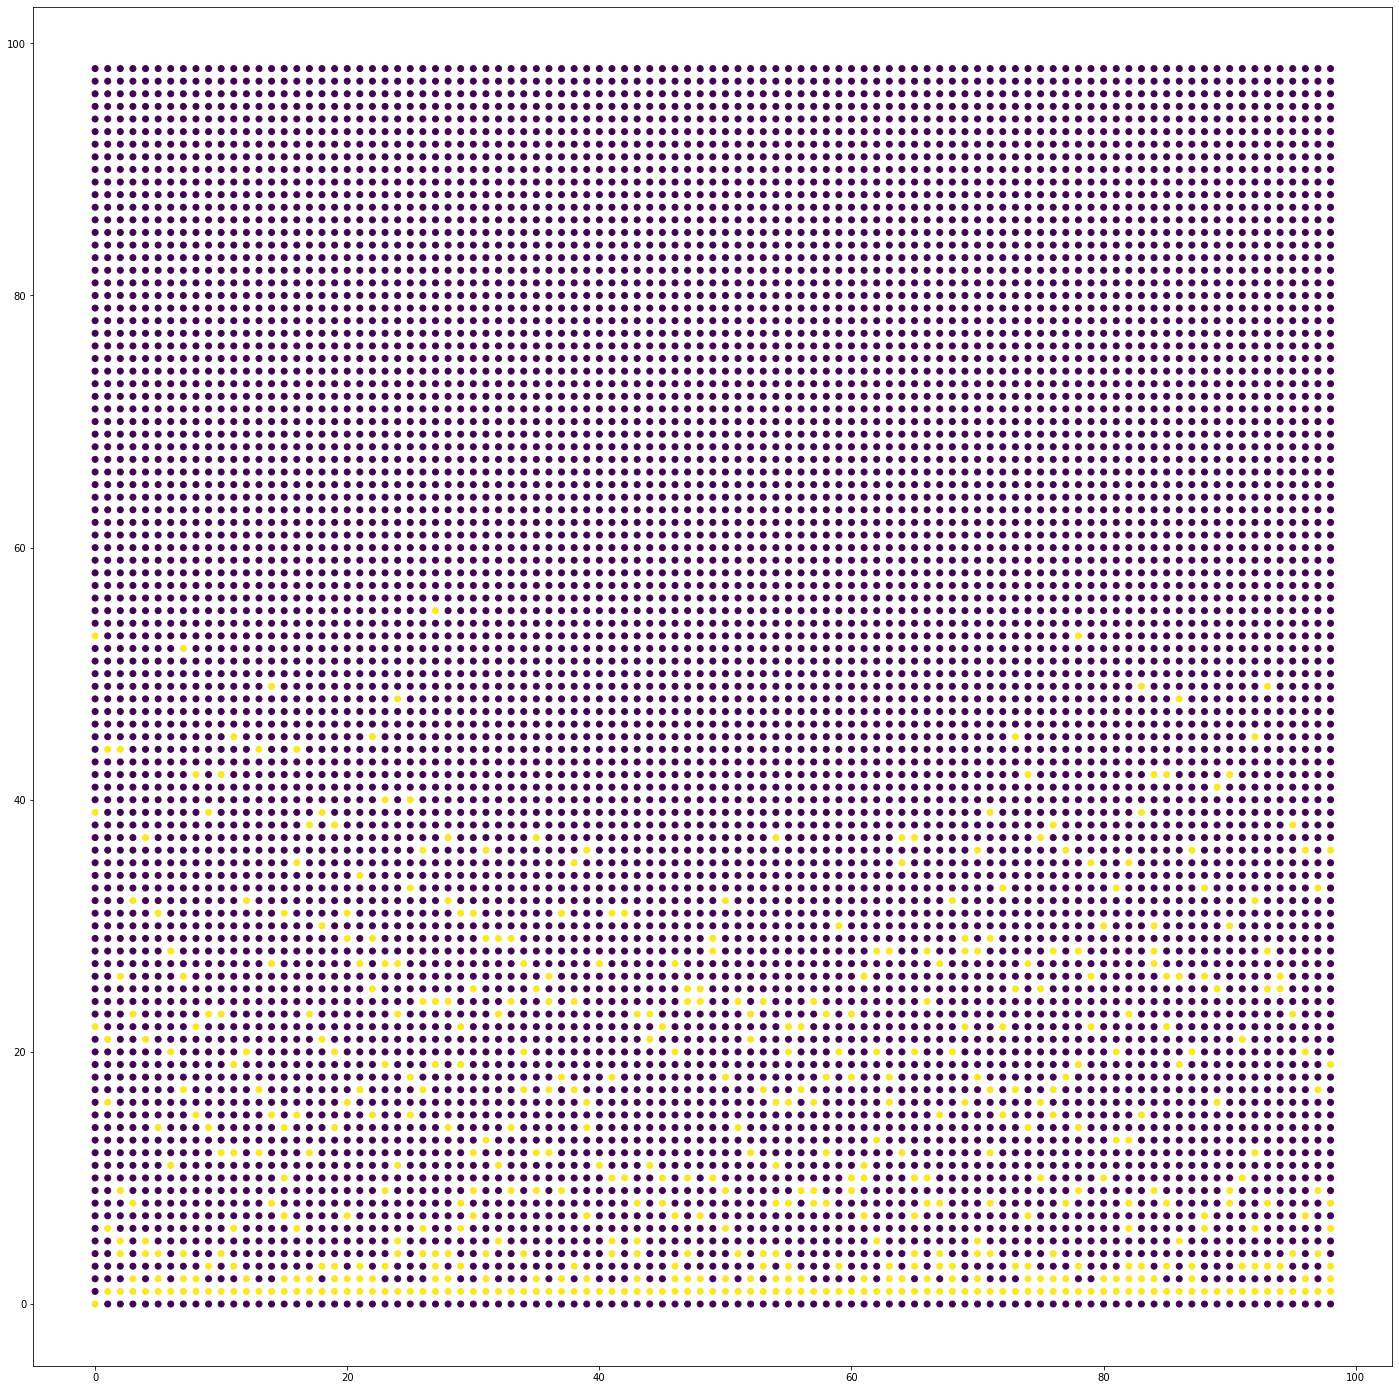

In [12]:
gdf.plot('visible', figsize=(15,15))